# Práctica 11: Agrupamiento de datos

Esta práctica se enfocada en una herramienta llamada [***Agrupamiento***](https://es.wikipedia.org/wiki/Algoritmo_de_agrupamiento), la cual es una técnica de ***aprendizaje no supervisado*** porque en este caso solo se tienen los datos de entrada y los datos de salida no existen, de modo que los algoritmos de agrupamiento buscan encontrar patrones dentro de los datos de entrada de acuerdo algún ***criterio de similitud o distancia *** y los grupos se generan a partir de datos que tengan similitud entre ellos o estén cercanos entre sí.

Los datos a utilizar son imágenes de los dígitos del 0 al 9, representados por un vector de 784 elementos con valores reales. Esta base de datos contiene la etiqueta o salida de las imágenes, sin embargo, el objetivo es observar si los algoritmos de agrupamiento son posibles de agrupas las imágenes de los dígitos de forma correcta, ya que la salida del agrupamiento se puede comparar con las etiquetas reales. La premisa de los algoritmos de agrupación es encontrar relaciones entre los datos y a partir de estas poder separarlos en grupos, de modo que las salidas indican fuertes correlaciones entre los datos que forman parte de un grupo, las cuales pueden usarse en un problema de clasificación o regresión para mejorar el rendimiento.

In [99]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
train=np.genfromtxt('mnist_train.csv',delimiter=',')   #cargando datos de entrenamiento
#train    #la primer componente indica la etiqueta y el resto son los pixeles de la imagen

La base de datos tiene 10 etiquetas posibles para la salida de forma que se puede decir que esta agrupada en 10 grupos. Para no trabajar con toda la base de datos se toma una muestra de 100 elementos de cada grupo de forma aleatoria. El algoritmo mas simple de agrupamiento es el de [***K medias***](https://scikit-learn.org/stable/modules/clustering.html#k-means), el cual pide explícitamente el número de grupos en que se desea separar los datos, en este caso 10. A continuación se muestra algunas métricas de comparación, los grupos formados por K medias y los grupos reales.

In [38]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

digitos_idx=dict()
for i in range(10):
    digitos_idx[str(i)]=list()
for i in range(len(train)):
    digitos_idx[str(int(train[i,0]))].append(i)
sel_idx=np.array([])
for i in digitos_idx:
    sel_idx=np.append(sel_idx,np.random.choice(digitos_idx[i],100,replace=False,p=None))

np.random.shuffle(sel_idx)
sel_idx=sel_idx.astype('int32')

datos=train[:,1:][sel_idx] #se toman solo los pixeles de las imagenes, '[t[0]]' solo indica un tama\~no del conjunto de 
                        #datos
labels=train[:,0][sel_idx]  #se toman solo las etiquetas de cada imagen, '[t[0]]' solo indica un tama\~no del conjunto de 
                        #datos
estimador=KMeans(init='k-means++', n_clusters=10, n_init=10)  #algoritmo de agrupamiento KMeans, indicando el solver,
                                                                #numero de custer en este caso 10 por los diez digitos
estimador.fit(datos)    #generando los grupos a partir solo de los pixeles de las imagenes
#diferentes metricas que existen
from sklearn import metrics
print('homogeneity_score= ',metrics.homogeneity_score(labes, estimador.labels_))
print('completeness_score= ',metrics.completeness_score(labes, estimador.labels_))
print('v_measure_score= ',metrics.v_measure_score(labes, estimador.labels_))
print('adjusted_rand_score= ',metrics.adjusted_rand_score(labes, estimador.labels_))
print('adjusted_mutual_info_score= ',metrics.adjusted_mutual_info_score(labes,  estimador.labels_))
print('silhouette_score= ',metrics.silhouette_score(datos, estimador.labels_,metric='euclidean',sample_size=300))

homogeneity_score=  0.01878069634912143
completeness_score=  0.01923032720225928
v_measure_score=  0.0190028524431441
adjusted_rand_score=  0.0005053221977646205
adjusted_mutual_info_score=  0.0007495075795873568
silhouette_score=  0.060863779032585504


C:\Users\Alan\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


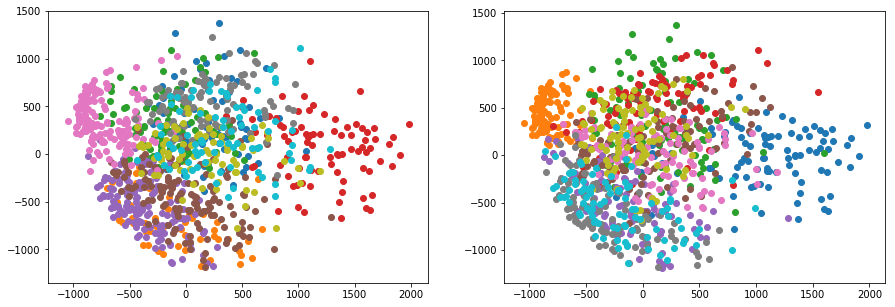

In [41]:
#se aplica un PCA para reducir el numero de atributos a 2
reduced_data = PCA(n_components=2).fit_transform(datos)
#se grafica en forma de dispersion cada uno de los puntos que forman parte de un grupo
fig, ax = plt.subplots(1,2,figsize=(15,5))
for i in np.unique(estimador.labels_):
    ax[0].scatter(reduced_data[:,0][np.where(estimador.labels_==i)[0]],reduced_data[:,1][np.where(estimador.labels_==i)[0]])
    ax[1].scatter(reduced_data[:,0][np.where(labels==i)[0]],reduced_data[:,1][np.where(labels==i)[0]])

Esta primera prueba da similitudes muy bajas por ello la graficas de los grupos generados por K medias están uno arriba del otro. Por otra la grafica de los grupos reales también están uno arriba del otro, esto indica que es necesario hacer esfuerzos en la **reducción de atributos o aplicar transformaciones** que permitan separación entre los grupos. A continuación se prueba otro algoritmo de agrupación llamado [***propagación de afinidad***]( https://scikit-learn.org/stable/modules/clustering.html#affinity-propagation) en el cual los datos son descritos usando un pequeño numero de estos, los cuales son identificados como los más representativos de los demás. Al utilizar propagación de afinidad uno no puede poner explícitamente el numero de grupos en que desea separar los datos, sin embargo, es posible utilizar otros parámetros a través de los cuales se controla la afinidad entre los grupos. El objetivo de utilizar no es ver cuantos o como genera los grupos, sino observar cuales dígitos agrupa juntos porque de igual modo esta información puede ser utilizada en problemas de clasificación o regresión.

In [101]:
from sklearn.cluster import AffinityPropagation

estimador = AffinityPropagation(damping = 0.9911, convergence_iter = 30)
estimador.fit(datos)
print('homogeneity_score= ',metrics.homogeneity_score(labes, estimador.labels_))
print('completeness_score= ',metrics.completeness_score(labes, estimador.labels_))
print('v_measure_score= ',metrics.v_measure_score(labes, estimador.labels_))
print('adjusted_rand_score= ',metrics.adjusted_rand_score(labes, estimador.labels_))
print('adjusted_mutual_info_score= ',metrics.adjusted_mutual_info_score(labes,  estimador.labels_))
print('silhouette_score= ',metrics.silhouette_score(datos, estimador.labels_,metric='euclidean',sample_size=300))
print(len(np.unique(estimador.labels_)))

homogeneity_score=  0.01564363939341107
completeness_score=  0.0191110190877748
v_measure_score=  0.01720436362288453
adjusted_rand_score=  0.0005334972475862875
adjusted_mutual_info_score=  -0.0008983513930778042
silhouette_score=  0.05704102044411097
9


C:\Users\Alan\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Grupo  1 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Grupo  2 [0. 1. 2. 3. 5. 6. 8.]
Grupo  3 [2. 4. 5. 9.]
Grupo  4 [0. 2. 3. 5. 6. 9.]
Grupo  5 [0. 2. 3. 4. 5. 6. 7. 8. 9.]
Grupo  6 [0. 1. 2. 3. 4. 5. 6. 8. 9.]
Grupo  7 [0. 2. 3. 4. 5. 6. 7. 8. 9.]
Grupo  8 [0. 2. 3. 4. 6. 7. 9.]
Grupo  9 [2. 3. 5. 6. 8. 9.]


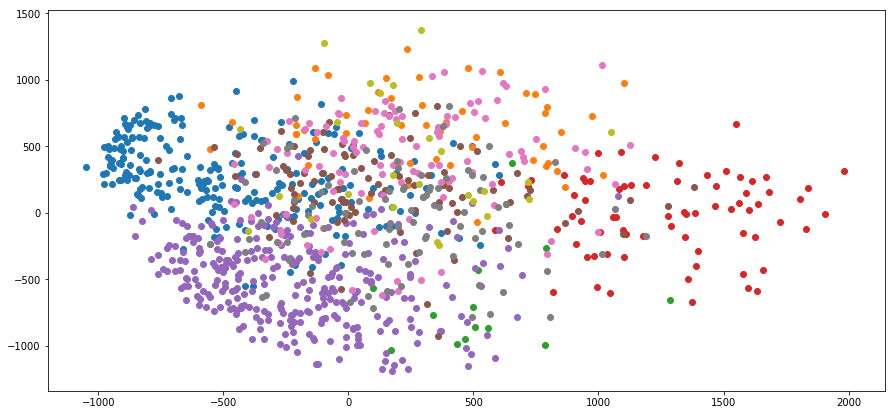

In [102]:
fig, ax=plt.subplots(figsize=(15,7))
for i in np.unique(estimador.labels_):
    ax.scatter(reduced_data[:,0][np.where(estimador.labels_==i)[0]],reduced_data[:,1][np.where(estimador.labels_==i)[0]])
j=1
for i in np.unique(estimador.labels_):
    print('Grupo ',j,np.unique(labels[np.where(estimador.labels_==i)[0]]))
    j=j+1

De igual forma que con K medias, las métricas de similitud son muy bajas y los grupos están uno arriba del otro. El algoritmo de propagación de afinidad separo los datos en 9 grupos y un análisis rápido señala que los dígitos 9, 5 y 4 son fáciles de confundir por ello se repiten en distintos grupos, al igual que los dígitos 8 y 6 y los dígitos 2 y 3.